In [46]:
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as RF

from sklearn import preprocessing

sns.set

labelencoder = preprocessing.LabelEncoder()

# charger le dataset
ipAdress = pd.read_csv(r"/content/IpAddress_to_Country.csv")
fraud = pd.read_csv(r"/content/Fraud_Data.csv")
ipAdress_df = ipAdress
fraud_df = fraud

In [2]:
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0.0
...,...,...,...,...,...,...,...,...,...,...,...
147856,376565,2015-03-10 02:31:02,2015-05-07 10:35:24,12,QQXSPLADSWNTJ,Direct,IE,M,38,4.694687e+08,0.0
147857,161233,2015-06-22 10:11:59,2015-08-12 14:33:18,21,OKCRSCNLVUUDS,SEO,IE,M,52,1.626951e+09,0.0
147858,38836,2015-03-23 08:23:36,2015-03-28 13:31:26,22,TEKHTSLTKRRDP,SEO,Chrome,F,33,1.154693e+09,0.0
147859,378106,2015-02-10 17:10:02,2015-03-17 19:01:56,25,GXAYITIOLABJU,SEO,Chrome,M,41,1.878978e+09,1.0


In [3]:
ipAdress_df

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [31]:
fraud_df = fraud_df.dropna()
ipAdress_df = ipAdress_df.dropna()

In [29]:
fraud_df['source'] = labelencoder.fit_transform(fraud_df['source'])
fraud_df['browser'] = labelencoder.fit_transform(fraud_df['browser'])
fraud_df['device_id'] = labelencoder.fit_transform(fraud_df['device_id'])

fraud_df = fraud_df.drop(['signup_time','purchase_time'], axis= 1)

fraud_df.sex = fraud_df['sex'].astype('category').cat.codes
fraud_df,ipAdress_df

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,34,89215,2,0,1,39,7.327584e+08,0
1,333320,16,24078,0,0,0,53,3.503114e+08,0
2,1359,15,131216,2,3,1,53,2.621474e+09,1
3,150084,44,3977,2,4,1,41,3.840542e+09,0
4,221365,39,68757,0,4,1,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...
151107,345170,43,125335,2,0,1,28,3.451155e+09,1
151108,274471,35,63001,2,4,1,32,2.439047e+09,0
151109,368416,40,64204,2,2,0,26,2.748471e+09,0
151110,207709,46,13118,2,0,1,37,3.601175e+09,0


In [75]:
def IP_to_country(ip) :
    try :
        return ipAdress_df.country[(ipAdress_df.lower_bound_ip_address <= ip)
                                & 
                                (ipAdress_df.upper_bound_ip_address >= ip)].iloc[0]
    except IndexError :
        return "Unknown"
fraud_df["IP_country"] = fraud_df.ip_address.apply(IP_to_country)

In [35]:
fraud_df

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,IP_country
0,22058,34,89215,2,0,1,39,7.327584e+08,0,Japan
1,333320,16,24078,0,0,0,53,3.503114e+08,0,United States
2,1359,15,131216,2,3,1,53,2.621474e+09,1,United States
3,150084,44,3977,2,4,1,41,3.840542e+09,0,Unknown
4,221365,39,68757,0,4,1,45,4.155831e+08,0,United States
...,...,...,...,...,...,...,...,...,...,...
151107,345170,43,125335,2,0,1,28,3.451155e+09,1,United States
151108,274471,35,63001,2,4,1,32,2.439047e+09,0,Netherlands
151109,368416,40,64204,2,2,0,26,2.748471e+09,0,Japan
151110,207709,46,13118,2,0,1,37,3.601175e+09,0,United States


In [50]:
fraud_df.to_csv("/content/Final_df.csv")

SyntaxError: ignored

In [40]:
Y = fraud_df['class']
Y

0         0
1         0
2         1
3         0
4         0
         ..
151107    1
151108    0
151109    0
151110    0
151111    0
Name: class, Length: 151112, dtype: int64

In [41]:
X = fraud_df.drop(['ip_address','class'], axis = 1)
X

,user_id,purchase_value,device_id,source,browser,sex,age,IP_country
0,22058,34,89215,2,0,1,39,Japan
1,333320,16,24078,0,0,0,53,United States
2,1359,15,131216,2,3,1,53,United States
3,150084,44,3977,2,4,1,41,Unknown
4,221365,39,68757,0,4,1,45,United States
...,...,...,...,...,...,...,...,...
151107,345170,43,125335,2,0,1,28,United States
151108,274471,35,63001,2,4,1,32,Netherlands
151109,368416,40,64204,2,2,0,26,Japan
151110,207709,46,13118,2,0,1,37,United States


In [57]:
X['IP_country'] = labelencoder.fit_transform(X['IP_country'])
X

,user_id,purchase_value,device_id,source,browser,sex,age,IP_country
0,22058,34,89215,2,0,1,39,84
1,333320,16,24078,0,0,0,53,171
2,1359,15,131216,2,3,1,53,171
3,150084,44,3977,2,4,1,41,172
4,221365,39,68757,0,4,1,45,171
...,...,...,...,...,...,...,...,...
151107,345170,43,125335,2,0,1,28,171
151108,274471,35,63001,2,4,1,32,118
151109,368416,40,64204,2,2,0,26,84
151110,207709,46,13118,2,0,1,37,171


In [51]:
fraud_df.to_csv("/content/Final_df.csv")

In [58]:
X

,user_id,purchase_value,device_id,source,browser,sex,age,IP_country
0,22058,34,89215,2,0,1,39,84
1,333320,16,24078,0,0,0,53,171
2,1359,15,131216,2,3,1,53,171
3,150084,44,3977,2,4,1,41,172
4,221365,39,68757,0,4,1,45,171
...,...,...,...,...,...,...,...,...
151107,345170,43,125335,2,0,1,28,171
151108,274471,35,63001,2,4,1,32,118
151109,368416,40,64204,2,2,0,26,84
151110,207709,46,13118,2,0,1,37,171


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
splits = train_test_split(X,Y,
                          random_state=0)

for each in splits:
  print(each.shape)
X_train, X_test, Y_train, Y_test = splits
scaler = StandardScaler()

(113334, 8)
(37778, 8)
(113334,)
(37778,)


In [45]:
def accuracy(preds, Y):
  return ((preds == Y).sum() / len(Y)* 100)

In [73]:
rf = RF(max_depth=7)
rf.fit(X_train,Y_train)
prediction = rf.predict(X_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [74]:
accuracy(prediction,Y_test)

90.77770130763938

In [78]:
rf.fit(X_train, Y_train)
importance = rf.feature_importances_

array([0.11968277, 0.1727414 , 0.29199667, 0.05089279, 0.06755452,
       0.02956564, 0.15154847, 0.11601774])

Somme des pouvoirs predictif : 1.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


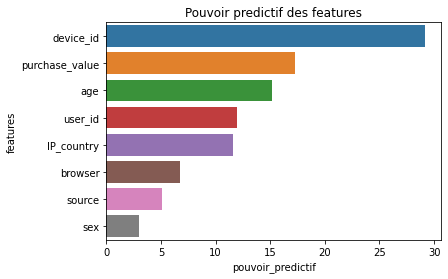

In [81]:
d = pd.DataFrame()
d['features'] = X_train.columns
d['pouvoir_predictif'] = importance
#for i in range (0, len(importances)):
#    print('{}{} : {}'.format(X_tr.columns[i], ' '*(30-len(X_tr.columns[i])), importances[i]))
print('Somme des pouvoirs predictif : {}'.format(d['pouvoir_predictif'].sum()))
d['pouvoir_predictif'] = d['pouvoir_predictif'].apply(lambda v : v*100)
d = d.sort_values(by='pouvoir_predictif', ascending=False)
sns.barplot(d['pouvoir_predictif'], d['features']).set_title('Pouvoir predictif des features');

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,prediction)

array([[34286,     0],
       [ 3492,     0]])